Text(0.5, 1.0, 'Original noised image')

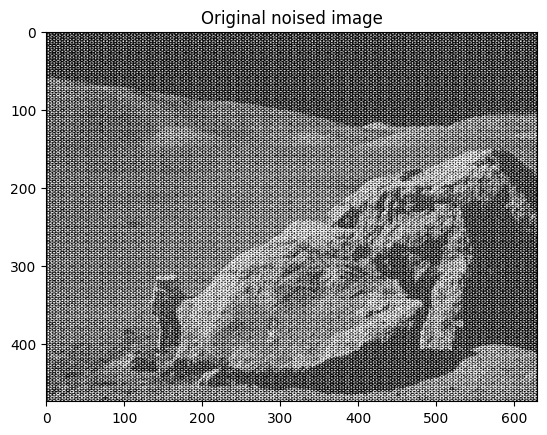

In [2]:
import matplotlib.pyplot as plt


# Loading noised image
filename = 'moonlanding.png'
noised_im = plt.imread(filename)
plt.figure()
plt.imshow(noised_im, cmap='gray')
plt.title('Original noised image') 

(567, 532)
0.015686275 1.0
0.26851395


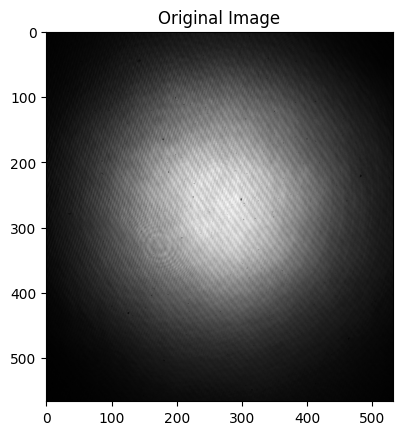

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


def plot_spectrum(im_fft):    
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

# Loading clean image
filename = 'beam1small.png'
im = plt.imread(filename)
print(im.shape)
plt.figure()
plt.imshow(im, cmap='gray')
plt.title('Original Image')

# defining noise std
noise_std = np.mean(im)/5
print(np.min(im), np.max(im))
print(np.mean(im))


Text(0.5, 1.0, 'Image with noise')

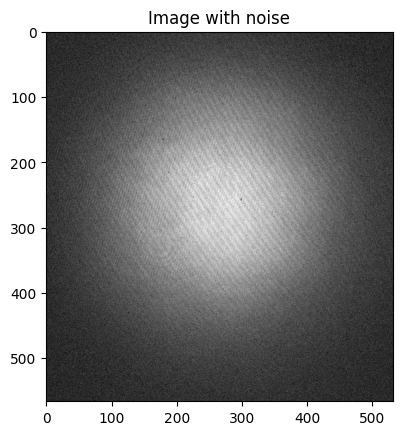

In [113]:
import numpy as np


# Implementing additive Gaussian noise
noise = np.random.normal(0, noise_std, im.shape) # full image noise
im_plus_noise = im + noise
plt.figure()
plt.imshow(im_plus_noise, cmap='gray')
plt.title('Image with noise')



Text(0.5, 1.0, 'Image with noise')

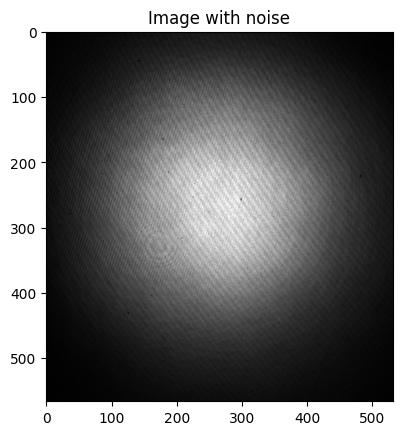

In [118]:
import numpy as np


# Implementing multiplicative Gaussian noise
noise = np.random.normal(1.0, noise_std, im.shape)
im_mult_noise = im * noise
im_mult_noise = np.clip(im_mult_noise, 0, 1).astype(float)

plt.figure()
plt.imshow(im_mult_noise, cmap='gray')
plt.title('Image with noise')



Text(0.5, 1.0, 'Noised Image')

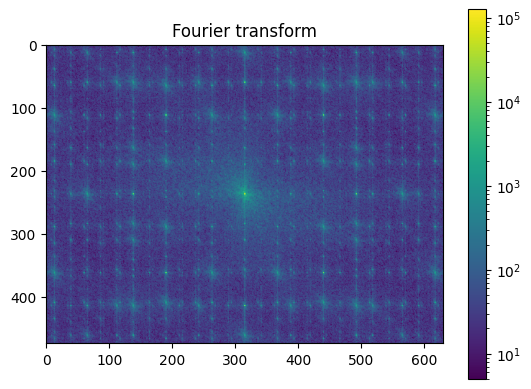

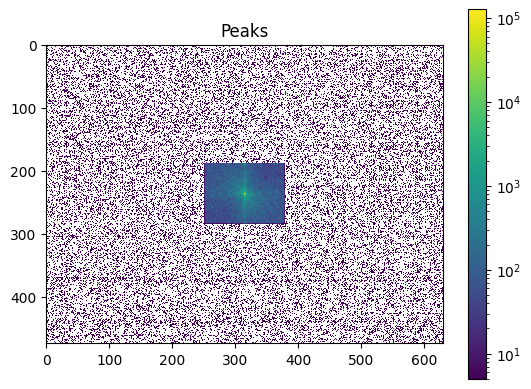

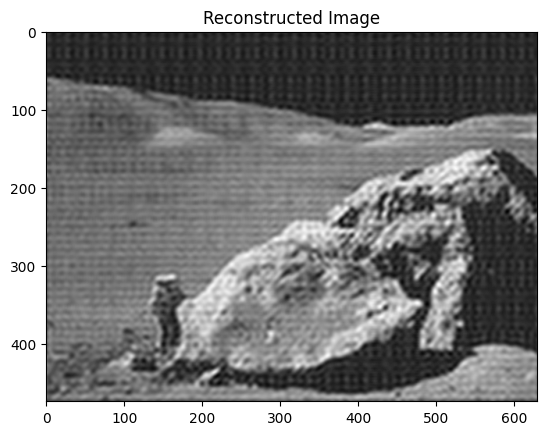

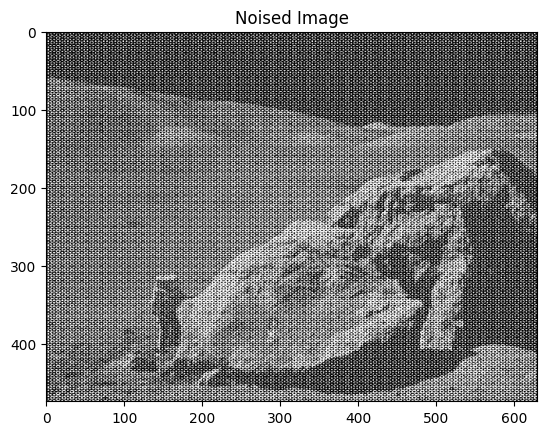

In [100]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift


def fft2_denoising_by_mask(noised_im, mask_x, mask_y):    
    noised_im_fft = fft2(noised_im)
    noised_im_fft = fftshift(noised_im_fft)
    peaks = noised_im_fft.copy()
    peaks[mask_x, :] = 0
    peaks[:,mask_y] = 0
    ipeaks = ifftshift(peaks)
    denoised_im = ifft2(ipeaks).real
    plt.figure()
    plot_spectrum(noised_im_fft)
    plt.title('Fourier transform')

    plt.figure()
    plot_spectrum(peaks)
    plt.title('Peaks')

    return denoised_im

# Here we will denoise moonlanding picture
# denoising by mask
(x, y) = noised_im.shape
center_mask_x = np.hstack((np.array(range(1, int(0.5 * x - 0.1 * x))), 
                 np.array(range(int(0.5 * x + 0.1 * x), x))))
center_mask_y = np.hstack((np.array(range(1, int(0.5 * y - 0.1 * y))), 
                 np.array(range(int(0.5 * y + 0.1 * y), y))))
denoised_im = fft2_denoising_by_mask(noised_im, center_mask_x, center_mask_y)

plt.figure()
plt.imshow(denoised_im, cmap='gray')
plt.title('Reconstructed Image')
plt.figure()
plt.imshow(noised_im, cmap='gray')
plt.title('Noised Image')

Text(0.5, 1.0, 'Blurred image')

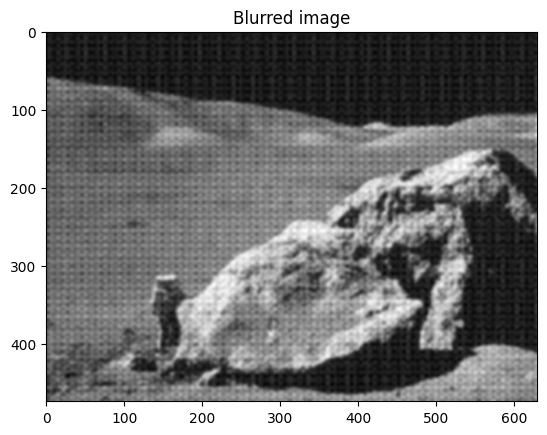

In [75]:
from scipy import ndimage


# Let's try scipy Gaussian filter
im_blur = ndimage.gaussian_filter(noised_im, 2)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')


Text(0.5, 1.0, 'Reconstructed Image')

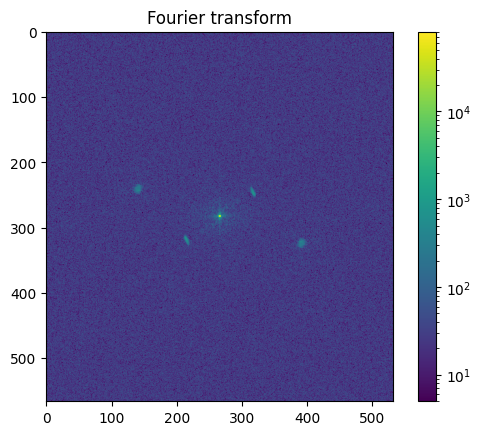

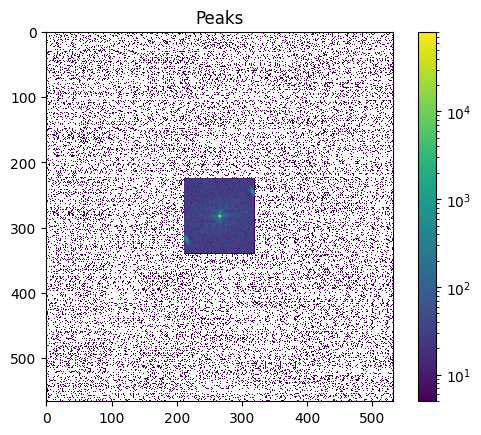

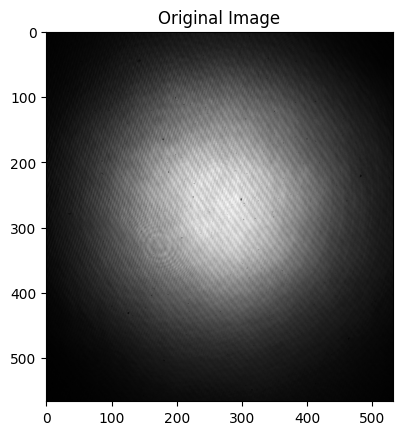

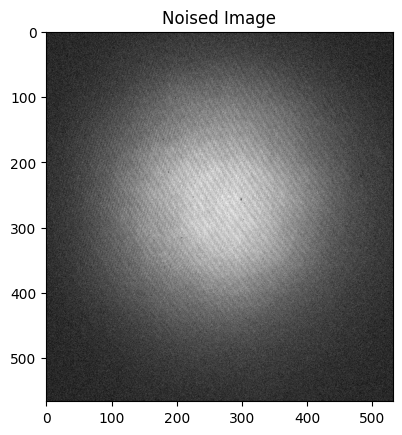

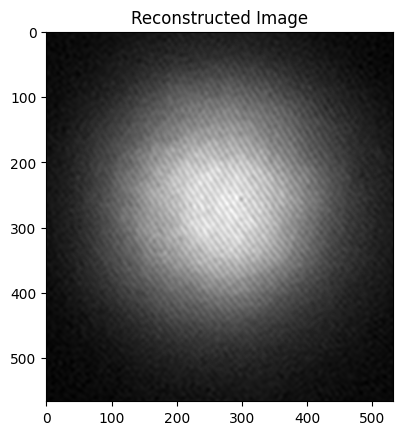

In [102]:
# Here we will try to compensate additive noise
# denoising by mask
(x, y) = im_plus_noise.shape
center_mask_x = np.hstack((np.array(range(1, int(0.5 * x - 0.1 * x))), 
                 np.array(range(int(0.5 * x + 0.1 * x), x))))
center_mask_y = np.hstack((np.array(range(1, int(0.5 * y - 0.1 * y))), 
                 np.array(range(int(0.5 * y + 0.1 * y), y))))
denoised_im = fft2_denoising_by_mask(im_plus_noise, center_mask_x, center_mask_y)


plt.figure()
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.figure()
plt.imshow(im_plus_noise, cmap='gray')
plt.title('Noised Image')
plt.figure()
plt.imshow(denoised_im, cmap='gray')
plt.title('Reconstructed Image')

In [105]:
def calculate_nmse(original_matrix, reconstructed_matrix):
    error = original_matrix - reconstructed_matrix
    mse = np.mean(np.square(error))
    nmse = mse / np.mean(np.square(original_matrix))

    return nmse

In [107]:
print('NMSE between original and additively noised images:')
print(calculate_nmse(im, im_plus_noise))

print('NMSE between original and denoised images:')
print(calculate_nmse(im, denoised_im))

NMSE between original and additively noised images:
0.023300105099193308
NMSE between original and denoised images:
0.002967022986742946


Text(0.5, 1.0, 'Reconstructed Image')

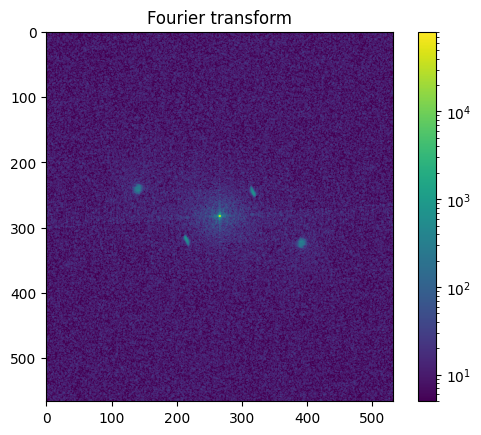

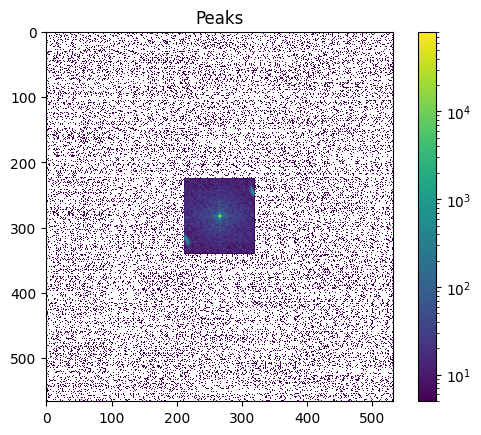

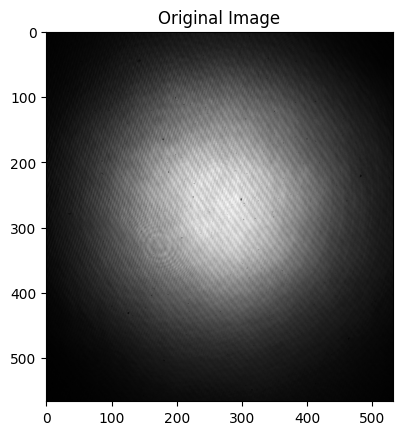

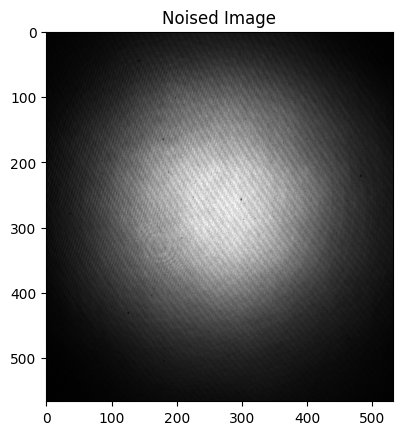

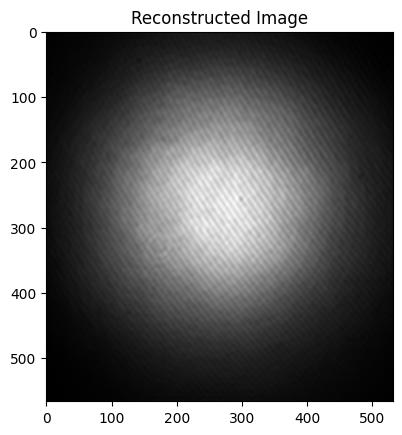

In [108]:
# Here we will try to compensate multiplicative noise
# denoising by mask
(x, y) = im_mult_noise.shape
center_mask_x = np.hstack((np.array(range(1, int(0.5 * x - 0.1 * x))), 
                 np.array(range(int(0.5 * x + 0.1 * x), x))))
center_mask_y = np.hstack((np.array(range(1, int(0.5 * y - 0.1 * y))), 
                 np.array(range(int(0.5 * y + 0.1 * y), y))))
denoised_im2 = fft2_denoising_by_mask(im_mult_noise, center_mask_x, center_mask_y)


plt.figure()
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.figure()
plt.imshow(im_mult_noise, cmap='gray')
plt.title('Noised Image')
plt.figure()
plt.imshow(denoised_im2, cmap='gray')
plt.title('Reconstructed Image')

In [109]:
print('NMSE between original and additively noised images:')
print(calculate_nmse(im, im_mult_noise))

print('NMSE between original and denoised images:')
print(calculate_nmse(im, denoised_im2))

NMSE between original and additively noised images:
0.0028907699403176693
NMSE between original and denoised images:
0.0021293034189668893
